# Progresa program analysis



## Introduction

We will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz. 

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
The following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [120]:
# importing the required packages
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# for plotting inline 
%matplotlib inline
import matplotlib as mp

# using ggplot styles
mp.style.use('ggplot')

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Presenting summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Presenting these in a single table alphabetized by variable name. 

In [121]:
#Reading the data
progresa=pd.read_csv("progresa_sample.csv")

In [122]:
#Converting to a dataframe
progresa_df=pd.DataFrame(progresa)

In [123]:
#Seeing the first 5 values
progresa_df.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [124]:
#Calculating the mean
a=np.mean(progresa_df,axis=0)

#Converting to dataframe
a=pd.DataFrame(a)

#Changing the variable name
a.index.name = 'Variables'

#Resetting the index
a.reset_index(inplace=True)

#Assigning column names
a.columns=["Variables","Mean"]

#Dropping not needed columns
a=a.drop(a.index[[0,15,16]])

#Printing the mean
a


,Variables,Mean
1,sex,0.512211
2,indig,0.298324
3,dist_sec,2.418910
4,sc,0.819818
5,grc,3.963537
6,fam_n,7.215715
7,min_dist,103.447520
8,dist_cap,147.674452
9,hohedu,2.768104
10,hohwag,586.985312


In [125]:
#Calculating standard deviation
b=np.std(progresa_df,axis=0)

#Coverting to dataframe
b=pd.DataFrame(b)

#Assigning column name
b.index.name = 'Variables'

#Resetting the index
b.reset_index(inplace=True)

#Assigning column names
b.columns=["Variables","Standard Deviation"]

#Dropping columns not needed
b=b.drop(b.index[[0,15,16]])

#Printing the standard deviation
b

,Variables,Standard Deviation
1,sex,0.499851
2,indig,0.457522
3,dist_sec,2.234094
4,sc,0.384339
5,grc,2.499046
6,fam_n,2.352885
7,min_dist,42.089168
8,dist_cap,76.062641
9,hohedu,2.656089
10,hohwag,788.128563


In [126]:
#Merging the datasets
a=a.merge(b,left_on='Variables',right_on='Variables',how='outer')

In [127]:
#Sorting them by variable name
a=a.sort_values(by='Variables')

#Printing thr required data
a

,Variables,Mean,Standard Deviation
13,age,11.366460,3.167723
7,dist_cap,147.674452,76.062641
2,dist_sec,2.418910,2.234094
5,fam_n,7.215715,2.352885
4,grc,3.963537,2.499046
14,grc97,3.705372,2.572371
12,hohage,44.436717,11.620296
8,hohedu,2.768104,2.656089
11,hohsex,0.925185,0.263093
9,hohwag,586.985312,788.128563


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? 


In [128]:
# Read the Progresa Data
progresa_data = pd.read_csv('progresa_sample.csv')

# Clean the data. Convert 'basal' to 1 and '0' to 0
progresa_data.loc[progresa_data['progresa'] == 'basal', 'progresa'] = float(1)
progresa_data.loc[progresa_data['progresa'] == '0', 'progresa'] = float(0)
progresa_data[['progresa']] = progresa_data['progresa'].astype(float)

#Converting to dataframe
progresa_df=pd.DataFrame(progresa_data)


In [129]:
# Creating the empty dataframe
diff = pd.DataFrame(columns=['Variable name','Average Value (Treatment villages)', 'Average value (Control villages)',
                            'Difference (Treat - Control)', 'p-value'])

# Subsetting the data to select only 'poor' people
poor = progresa_df[progresa_df['poor'] == 'pobre']

# Subsetting the data to select observations from 1997
old = poor[poor['year'] == 97]

# Splitting the data based on treatment and control
treat = old[old['progresa'] == 1]
control = old[old['progresa'] == 0]

#Initializing the variable
j = 0 

# Selecting columns that we need for our table
columns = ['sex', 'grc97','dist_sec','sc','grc','fam_n','min_dist', 'dist_cap','hohedu','hohwag',
           'welfare_index', 'hohsex','hohage','age','sc97']

# Calculating mean and p-value
for i in sorted(columns):
    t, pv = sc.stats.ttest_ind(treat[~np.isnan(treat[i])][i], control[~np.isnan(control[i])][i])  
    diff.loc[j] = [i, round(np.mean(treat[i]),4), round(np.mean(control[i]),4), 
            round(np.mean(treat[i]) - np.mean(control[i]),4), round(pv,3)]
    j+=1


# Printing the table created
diff

,Variable name,Average Value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.7170,10.7420,-0.0250,0.479
1,dist_cap,150.8291,153.7697,-2.9407,0.001
2,dist_sec,2.4531,2.5077,-0.0545,0.036
3,fam_n,7.2813,7.3025,-0.0211,0.427
4,grc,3.5316,3.5430,-0.0115,0.689
5,grc97,3.5316,3.5430,-0.0115,0.689
6,hohage,43.6488,44.2769,-0.6281,0.000
7,hohedu,2.6631,2.5903,0.0728,0.011
8,hohsex,0.9247,0.9229,0.0017,0.571
9,hohwag,544.3395,573.1636,-28.8240,0.000


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: Yes, there are statistically significant differences between treatment and control villages at the baseline. This is evidenced by the p-values generated which are lesser than 0.05 which I am considering as a threshold for statistical significance with a confidence interval of 95%. The following variables are statistically significant.

1. welfare_index - welfare index of the ones in control/treatment group
2. sex - the sex of the child
3. hohwag - This shows that the treatment/control have different households when it comes to wages
4. hohedu - The highest education level of the head of household 
5. hohage - Age of the head of household
6. dist_sec - Distance from secondary school
7. dist_cap - Distance from capital

B: As the differences already exist at the baseline there is a possibility for chanced bias which would change the results of the treatment which in turn might affect the outcome. Chance bias can be fixed by using methods like fixed effects but it causes us to question the randomness of treatment and control groups.

C: The difference in the baseline as suggested above shows the possibility of chance bias. This might affect the outcome of the treatment to be different (higher or lower) than it should be and hence could possibly lead to the experiment failing. In case of significant differences we have to adjust for these baseline differences. This would include running a multiple linear regression with fixed effects which would help us get closer to the randomized experiment that we envisioned.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997.

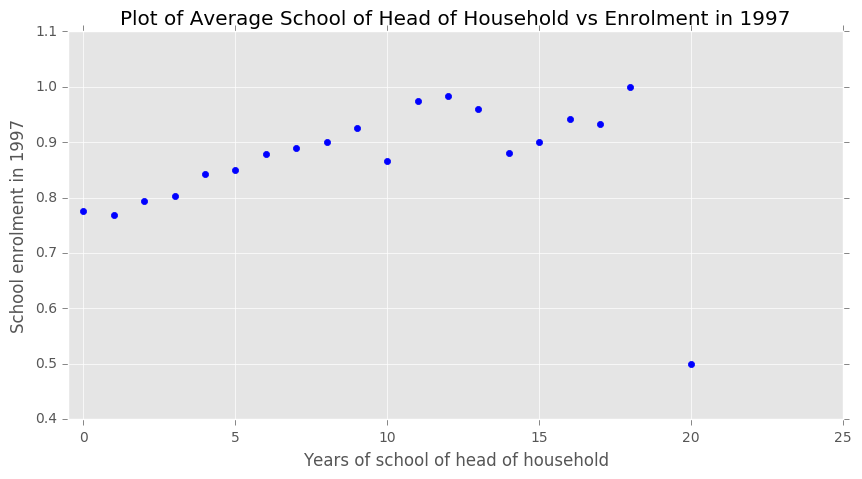

In [130]:
# enrollment rates based on the years of education of the head of household.
plot_data = pd.DataFrame(progresa_df[progresa_df['year'] == 97].groupby('hohedu').mean()['sc'])

# Plotting the graph
plt.figure(figsize=(10,5))
a = plt.scatter(x = plot_data.index.tolist(), y = plot_data['sc'], color = 'b')
plt.xlim(-0.5,25)
plt.xlabel('Years of school of head of household')
plt.ylabel('School enrolment in 1997')
plt.title('Plot of Average School of Head of Household vs Enrolment in 1997')
plt.show()

In the above scatterplot, we can notice a very clear trend of the school enrollment increasing with the years of school for the head of the household. This tells us that if the head of a household is educated, they would want their children to be educated as well. We do see a dip at x=20 but that can be considered as an outlier. The scatterplot indicates a clear positive correlation between the years of school of head of household and rate of school enrollment.

### 1.5 Graphical exploration, part 2

Creating a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculating the average rate of enrollment of poor households in treated villages in 1997, then computing the average rate of enrollment of poor households in treated villages in 1998. 

The mean enrollment rate in 1997 was: 81.38 %


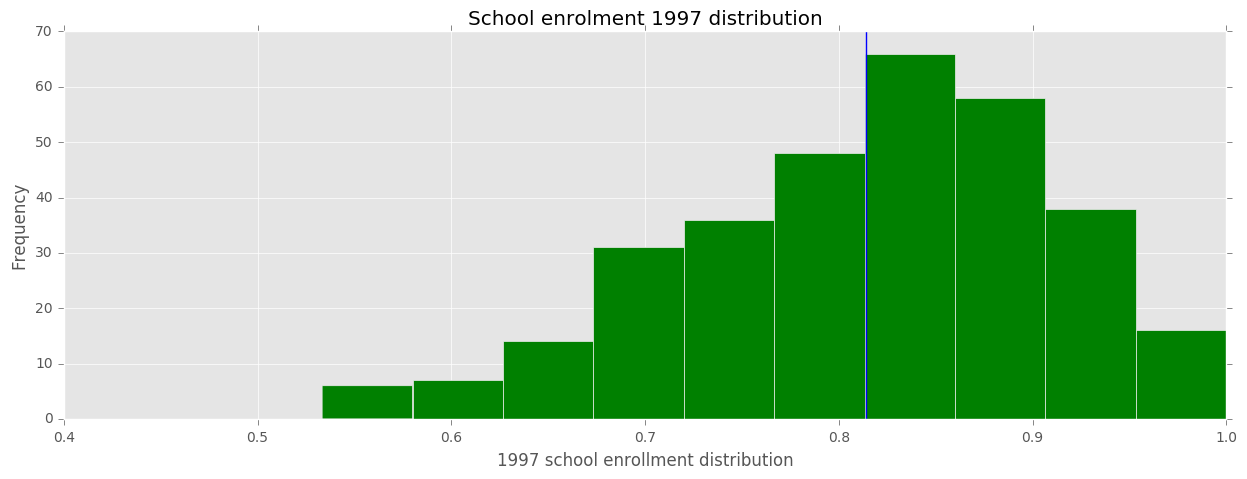

The mean enrollment rate in 1998 was: 82.95 %


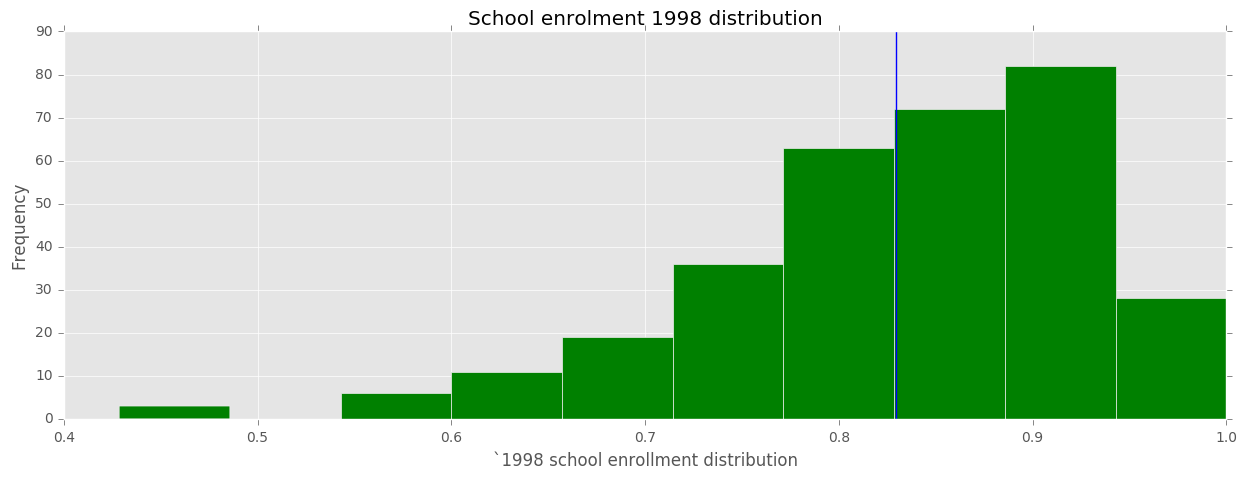

In [131]:
# Plotting for 1997
plt.figure(figsize=(15,5))

# Creating a groupby village table to calculate mean enrollment rates
vil_group = treat.groupby('village').mean()

# Calculating mean enrollment rates
a = np.array(vil_group['sc'])
mean = a.mean()
print("The mean enrollment rate in 1997 was:", round(mean*100,2), '%')

# Plotting histogram for 1997
plot = plt.hist(a, bins=10,color='g')
plt.axvline(x = mean, color = 'b')
plt.xlabel('1997 school enrollment distribution')
plt.ylabel('Frequency')
plt.title('School enrolment 1997 distribution')
plt.xlim([0.4,1])
plt.show()


# Plotting for year 1998
plt.figure(figsize=(15,5))

# Subsetting data for the use in histogram plot
poor = progresa_df[progresa_df['poor'] == 'pobre']
n = poor[poor['year'] == 98]
treat = n[n['progresa'] == 1]
control = n[n['progresa'] == 0]
n = treat.groupby('village').mean()

# Calculating mean enrollment rates
b = np.array(n['sc'])#, new_group.index.tolist() )
mean2 = b.mean()
print("The mean enrollment rate in 1998 was:", round(mean2*100,2), '%')

# Plotting histogram for year 98
plot2 = plt.hist(b, bins=10,color='g')
plt.axvline(x = mean2, color = 'b')
plt.xlabel('`1998 school enrollment distribution')
plt.ylabel('Frequency')
plt.title('School enrolment 1998 distribution')
plt.xlim([0.4,1])
plt.show()

The above results show a shift in the mean enrollment rate as well as the histogram distribution. This tells us that the treatment might have had an effect in the school enrollment rates of poor households. To see if this shift is statistically significant, we will perform a t-test and get its p-value.

In [132]:
#Checking for statistical significance
t, p = scipy.stats.ttest_ind( n['sc'], vil_group['sc'], equal_var=True)
print("The results of the t-test are - ")
print("t-statistic : ", t)
print("p-value : ", p)

The results of the t-test are - 
t-statistic :  2.01571348652
p-value :  0.0442487003657


We notice that the t-test produces a p-value of 0.044 which is less that 0.05. This shows that the sift that has occured is statistically significant. This shows that the treatment had a positive impact in school enrollment for the `treatment` villages and hence can reject the null hypothesis related to it based on the p-value.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Starting out by estimating the impact of Progresa using "simple differences." 

* calculating the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.

In [133]:
# Print average difference
print('The average difference in enrollment rates among poor households in Treatment (', round(treat['sc'].mean(),4), 
      ') villages and the average enrollment rate among poor households (', round(control['sc'].mean(),4),
      ') in control villages is ',
      round(treat['sc'].mean() - control['sc'].mean(),4))

# Calculate the T-stat & p-value
t, p = scipy.stats.ttest_ind(treat[~np.isnan(treat['sc'])]['sc'],control[~np.isnan(control['sc'])]['sc'])

# Print results
pd.DataFrame(list([round(t,3), p]),index = ['T-statistic', 'p-value'], columns = ['Value'])

The average difference in enrollment rates among poor households in Treatment ( 0.8465 ) villages and the average enrollment rate among poor households ( 0.8076 ) in control villages is  0.0388


,Value
T-statistic,8.359000e+00
p-value,6.636344e-17


The average difference in enrollment rates is shown to be 0.0388. On performing the t-test we get a p-value that is less than 0.05 which shows that the difference in enrollment rates is statistically significant. This shows that there has been an effect on the school enrollment in poor households by using the treatment. This assessment is based on the assumption that there an no external factors affecting this experiment.


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. 

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [134]:
# Preparing data for regression
a = progresa_df[(progresa_df['poor'] == 'pobre') & (progresa_df['year'] == 98)][['sc','progresa']]

# Removing NaNs
a = a[~np.isnan(a['sc'])]

# Running linear regression
mod1 = smf.ols(formula = 'sc ~ progresa', data = a).fit()

# Printing results
print(mod1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.003     
Dependent Variable: sc               AIC:                23855.3045
Date:               2017-01-27 09:14 BIC:                23871.7448
No. Observations:   27450            Log-Likelihood:     -11926.   
Df Model:           1                F-statistic:        69.87     
Df Residuals:       27448            Prob (F-statistic): 6.64e-17  
R-squared:          0.003            Scale:              0.13961   
---------------------------------------------------------------------
              Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept     0.8076     0.0037   220.6758   0.0000   0.8005   0.8148
progresa      0.0388     0.0046     8.3587   0.0000   0.0297   0.0480
-------------------------------------------------------------------
Omnibus:             7638.939      Durbin-Watson:       

* This model shows that that progresa increased the enrollment rate by a factor 0.0388. This basically means that that the people in the villages that received the progresa treatment were more likely to be enrolled in schools by a factor of 0.0388. The baseline of the enrollment rate was 0.8076 for reference.

* We can see that the t-test in our regression model is equal to the t-test that we obtained from the single difference above. 

* From the analysis we can reject the null hypothesis that progresa didn't affect the enrollment of children in poor households as the p-value is < 0.05. This tells us that the effects of progresa have a significant effect on the enrollment of poor children.

* As the p-value from the t-test is <0.05, we can reject the null hypothesis that progresa did not affect the enrollment of children in poor households. The p-value shows that progressas did have a positive impact on the enrollment of poor children in the treatment villages.

* The counterfactual assumption is that in the absence of treatment, the control group will truly represent the treatment group. This means that the average enrollment rate would be equal between the controla and treatment groups in the absent of treatment.


### 2.3 Multiple Regression

Re-running the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [135]:
#Reshaping the data
a2 = progresa_data[(progresa_data['poor'] == 'pobre') & (progresa_data['year'] == 98)][['sc','progresa','age','dist_sec','hohedu','sex','welfare_index','indig']]

#Dropping NAs
a2 = a2.dropna()

#Running inear regression
mod2 = smf.ols('sc ~ progresa + age + hohedu + dist_sec + sex + indig + welfare_index', data = a2).fit()
print(mod2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.267     
Dependent Variable: sc               AIC:                15294.7239
Date:               2017-01-27 09:14 BIC:                15360.4314
No. Observations:   27267            Log-Likelihood:     -7639.4   
Df Model:           7                F-statistic:        1419.     
Df Residuals:       27259            Prob (F-statistic): 0.00      
R-squared:          0.267            Scale:              0.10257   
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       1.5025    0.0143  105.3423  0.0000   1.4746   1.5305
progresa        0.0352    0.0040    8.7990  0.0000   0.0274   0.0430
age            -0.0655    0.0007  -95.1046  0.0000  -0.0669  -0.0642
hohedu          0.0085    0.0008   10.9511  0.0000   0.0070 

* The controls have reduced the effect of the treatment. From a factor of increasing school rates by 0.0388 it has now reduced to 0.0352. This shows that there might have been some other factors as well which were contributing to the increase in enrollment rates.

* The standard error has reduced from 0.0046 to 0.0040 which shows that our model has imporved slightly. This shows that the estiated effect of the treatment on the enrollment is more accurate using this model. This is due to the addition of newer variabes.

* There are 2 things that stand out when analyzing the model. First, we see an increase in the intercept of the model which can be due to the increase in variables. The intercept can be seen as the enrollment rate given that every other varaible is 0 or does not exist. Secondly, we see a dramatic increase in the R-squared values between the models. This shows that this model is much better at explaining the variance than the previous model. Also, it provides a better fit.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculating the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then computing the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [136]:
#1997 control data
control_97 = progresa_df[(progresa_df['poor'] == 'pobre') & (progresa_df['year'] == 97) & 
                            (progresa_df['progresa'] == 0)]['sc'].mean()

#1998 control data
control_98 = progresa_df[(progresa_df['poor'] == 'pobre') & (progresa_df['year'] == 98) & 
                            (progresa_df['progresa'] == 0)]['sc'].mean()

#1997 treatment data
treat_97 = progresa_data[(progresa_df['poor'] == 'pobre') & (progresa_df['year'] == 97) & 
                            (progresa_df['progresa'] == 1)]['sc'].mean()

#1998 control data
treat_98 = progresa_data[(progresa_df['poor'] == 'pobre') & (progresa_df['year'] == 98) & 
                            (progresa_df['progresa'] == 1)]['sc'].mean()

#Differences in treatment and control
treat_diff = treat_98 - treat_97
control_diff = control_98 - control_97

print("The double difference of average enrolment is : ", treat_diff - control_diff)

#Double difference calculation and table
doublediff = pd.DataFrame(columns=['1997', '1998', 'Difference'], index=['treat', 'control'])
doublediff['1997']['treat'] = round(treat_97,4)
doublediff['1997']['control'] = round(control_97,4)
doublediff['1998']['treat'] = round(treat_98,4)
doublediff['1998']['control'] = round(control_98,4)
doublediff['Difference']['treat'] = round(treat_diff,4)
doublediff['Difference']['control'] = round(control_diff,4)

#Printing the avlues
print('The double difference table can be shown below where each value represents the average',
      ' enrollment rates')
doublediff

The double difference of average enrolment is :  0.0313312803193
The double difference table can be shown below where each value represents the average  enrollment rates


,1997,1998,Difference
treat,0.8227,0.8465,0.0238
control,0.8152,0.8076,-0.0075


* We see that the the impact of the treament on the enrollment has now been reduced from its value in the simple linear regression model. It has reduced from 0.038 to 0.031. This dip can be attributed to the fact that the model has taken into account the impact of time based effect. There is a small growth in enrollment rates with time and this effect is incorrectly attributed to the treatment in the simple linear model.

* The counterfactual: Without treatment assuming that over time the change in student enrollment rates for treatment and control will have the identical trend as that of the control group then the treatment group without treatment will be a counterfactual to the treatment.

### 2.5 Difference-in-Difference, version 1 (regression)

Using a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. 

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [137]:
#Performing linear regression
mod3 = smf.ols(
    formula = "sc ~ progresa + year + year*progresa + age + hohedu + dist_sec + sex + indig + welfare_index", 
    data = poor).fit()

print(mod3.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.278     
Dependent Variable: sc               AIC:                33332.1890
Date:               2017-01-27 09:14 BIC:                33421.8733
No. Observations:   58013            Log-Likelihood:     -16656.   
Df Model:           9                F-statistic:        2488.     
Df Residuals:       58003            Prob (F-statistic): 0.00      
R-squared:          0.279            Scale:              0.10399   
-------------------------------------------------------------------
                   Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         -1.2257   0.4254   -2.8815 0.0040 -2.0594 -0.3920
progresa          -2.9893   0.5390   -5.5464 0.0000 -4.0456 -1.9329
year               0.0278   0.0044    6.3696 0.0000  0.0192  0.0364
year:progresa      0.0309   0.0055    5.5816 0.0000  0.0200  0.041

* Progresa effects on the basis of the difference in difference model are shown below. We are introducing an interaction term as shown below:

    Ignoring the controls, the model can be defined as: 

    y = Beta0 + Beta1*year + Beta2*progresa + Beta3*(year * progresa) + control

    Hence,

    Beta0 = pre control (1997)
    Beta0 + Beta1 = post control (1998)
    Beta0 + Beta2 = pre treat (1997)
    Beta0 + Beta1 + Beta2 + Beta3 = post treat (1998)

    Difference of difference:

    DD = (Beta0 + Beta1 + Beta2 + Beta3 - Beta0 - Beta2) - (Beta0 + Beta1 - Beta0)
    DD = (Beta1 + Beta3) - ( Beta1)
    DD = Beta3

    
    By examining the model we observe that the difference of difference or the impact of progresa on the enrollment rate has a positive fatcor of 0.0309 which is the coefficient of the interaction term (year * progresa) with a standard error of 0.0055.

* We see that the difference in difference estimate of the increase in enrollment rate due to progresa is 0.0309 which has reduced from the linear model estimate of 0.0388. This is similar to the findings we obtained from the Double difference caluclation that we had done above. This further reiterates our argument that as time is now being taken into consideration, we are seeing a reduction in the effect of the increase in enrollment rate due to progresa. 

* The reduction in estimated from (2.4) can be attributed to the fact that there are now 5 control variables. These control variables are now reducing the effects that might have occured if the variables had been added individually.

* The counterfactual: Without treatment assuming that the change in enrollment rates for treatment and control over time will follow an identical trend as that of the control group then the treatment group without the treatment will act as a counterfactual to the treatment.

### 2.6 Difference-in-Difference, version 2

In the previous section, we estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?

In [138]:
#Performing linear regression
mod4 = smf.ols(
    formula = "sc~progresa + poor + poor*progresa + age + hohedu + dist_sec + sex + indig + welfare_index", 
    data = progresa_df[(progresa_df['year'] == 98)]).fit()
print(mod4.summary2())

                     Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.268     
Dependent Variable:    sc                AIC:                 18602.6094
Date:                  2017-01-27 09:14  BIC:                 18686.3073
No. Observations:      31882             Log-Likelihood:      -9291.3   
Df Model:              9                 F-statistic:         1295.     
Df Residuals:          31872             Prob (F-statistic):  0.00      
R-squared:             0.268             Scale:               0.10490   
------------------------------------------------------------------------
                        Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               1.4994   0.0176   84.9790 0.0000  1.4648  1.5340
poor[T.pobre]          -0.0050   0.0090   -0.5611 0.5747 -0.0226  0.0125
progresa                0.0257   0.0098    2.6364 0.0084  0.0066  0.044

* The difference in difference model shows the effects and impact of progresa

    Ignoring the controls, the model can be defined as:  

    y = Beta0 + Beta1*poor + Beta2*progresa + Beta3*(poor * progresa) + control

    Hence,

    Beta0 = pre control
    Beta0 + Beta1 = post control
    Beta0 + Beta2 = pre treat
    Beta0 + Beta1 + Beta2 + Beta3 = post treat

    Difference of difference: 

    DD = (Beta0 + Beta1 + Beta2 + Beta3 - Beta0 - Beta2) - (Beta0 + Beta1 - Beta0)
    DD = (Beta1 + Beta3) - ( Beta1)
    DD = Beta3
    
    By examining the model we observe that the difference of difference or the impact of progresa on the enrollment rate has a positive fatcor of 0.0095 which is the coefficient of the interaction term (poor * progresa) with a standard error of 0.0106.
    
    This shows that in the yearv 1998 poor people with progresa had an increase in the enrollment rate by 0.0095.
    

* The counterfactual: Without treatment assuming that the poor people will follow an identical trend as that of the non poor people, then the poor people without the treatment will act as a true counterfactual for the treatment group.

* In this model, we see that the increase in enrollment rates of the poor in treatment villages is 0.0095 compared to the double difference model earlier where the estimate was 0.0309. The intercept is also different as the counterfactual assumption is changing.

* The assumption made in the counterfactual is that it is the poor people in the villages without treatment. As a result, we are comparing it with the poor people in villages which received the treatent. The earlier case was showing the counterfactual as the poor people if they were not treated. This change in the counterfactal impacts the change that we see in our observations above.



### 2.7 Spillover effects

We have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. 

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [139]:
#Performing linear regression
mod5 = smf.ols(
    formula = "sc ~ progresa + age + hohedu + dist_sec + sex + indig + welfare_index", 
    data = progresa_df[progresa_df['poor'] != 'pobre']).fit()
print(mod5.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.281    
Dependent Variable: sc               AIC:                7396.7188
Date:               2017-01-27 09:14 BIC:                7454.6644
No. Observations:   10334            Log-Likelihood:     -3690.4  
Df Model:           7                F-statistic:        577.3    
Df Residuals:       10326            Prob (F-statistic): 0.00     
R-squared:          0.281            Scale:              0.11969  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          1.4609   0.0293  49.8328 0.0000  1.4034  1.5183
progresa           0.0267   0.0070   3.8311 0.0001  0.0130  0.0404
age               -0.0677   0.0011 -59.5577 0.0000 -0.0700 -0.0655
hohedu             0.0094   0.0011   8.6815 0.0000  0.0073  0.0116
dist_sec    

*A: Progresa might have had a spillover effect as it it might have created an environment of peer effect where children seeing other children enrolling for school might have been inclined to enroll themselves. This is a psychological effect when people tend to follow a trend which is taking place in the community.

*B: We have completed a single difference regression analysis. In that analysis, we observed that there is a positive impact of progresa on the children in treatment villages. This shows that there is some spillover effect that has resulted in higher enrollment for non-poor people in treatment villages than non-treatment villages.

*C: The assumption is that there would have been no increase in the enrollment of non-poor people if there was no introduction of the progresa treatment.

### 2.8 Summary

Based on all the analysis you have undertaken to date, does Progresa have a causal impact on the enrollment rates of poor households in Mexico?

Following on from the analysis that we have conducted in the problem set, we can say that Progresa had a causal impact on the enrollment rates in the villages it was implemented. This can be concluded as there was a significant difference between treatment and control villages when taking into account baseline changes. There might be certain variables that we have not accounted for but still the assumption that the increase in enrollment rates is due to progresa is a safe one.